In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [2]:
ads = pd.read_csv('/Users/rahulkashyap/Downloads/Data Science Content /Learnbay course content/Time Series/ads.csv', index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('/Users/rahulkashyap/Downloads/Data Science Content /Learnbay course content/Time Series/currency.csv', index_col=['Time'], parse_dates=['Time'])

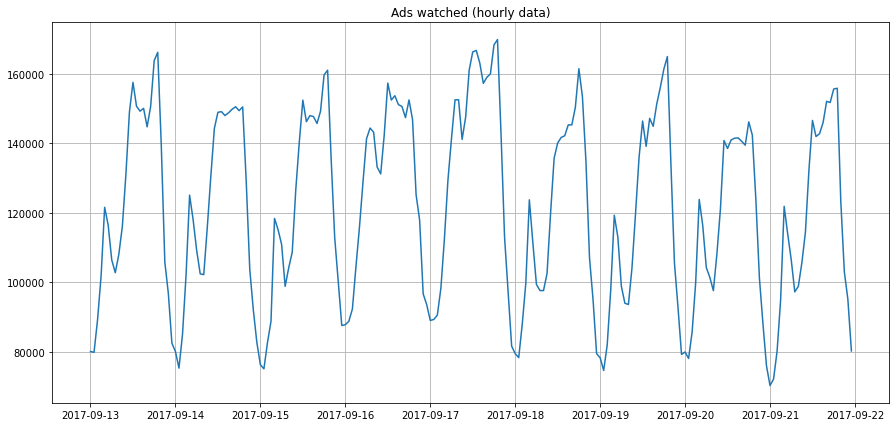

In [3]:
plt.figure(figsize=(15, 7))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

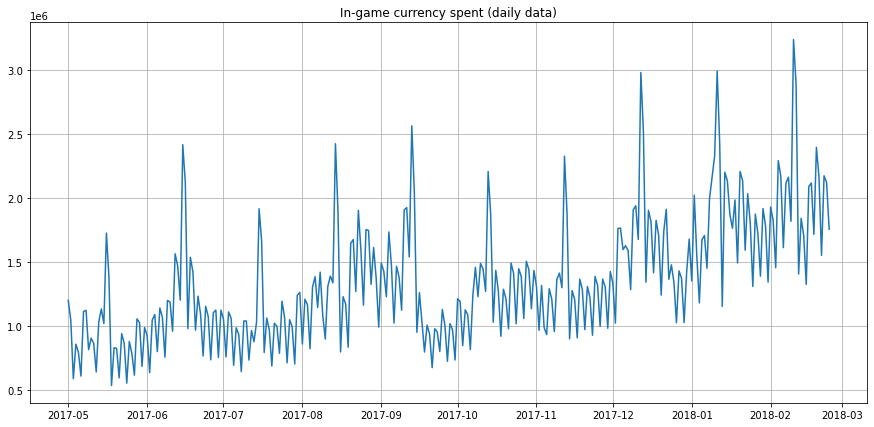

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

In [5]:
## Accuracy metrics

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [7]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

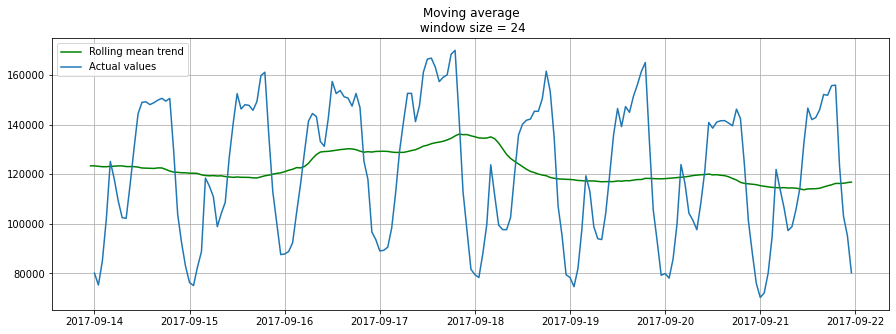

In [8]:
plotMovingAverage(ads, 24) 

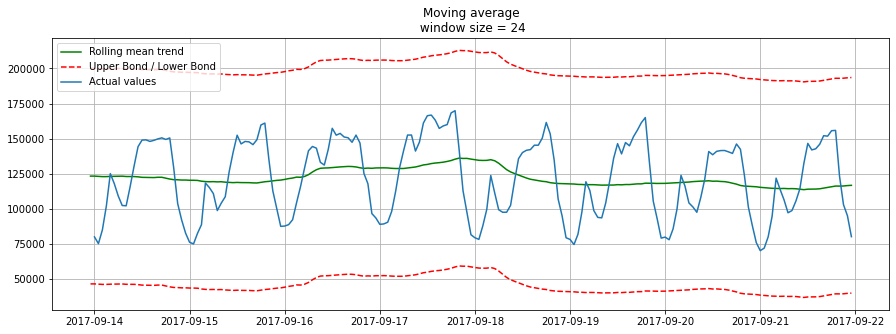

In [9]:
plotMovingAverage(ads, 24, plot_intervals=True)

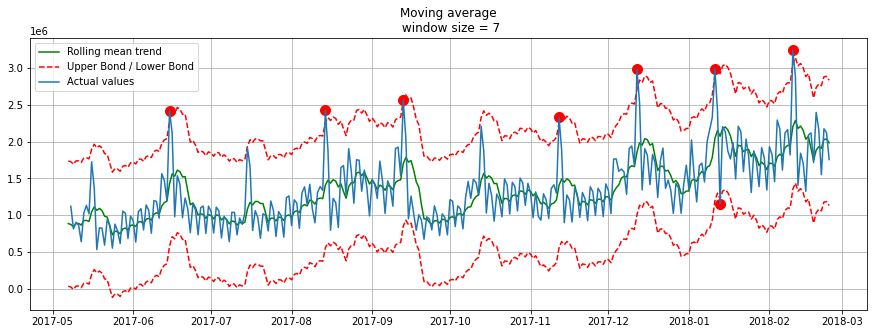

In [10]:
plotMovingAverage(currency, 7, plot_intervals=True, plot_anomalies=True) # weekly smoothing

In [11]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [12]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

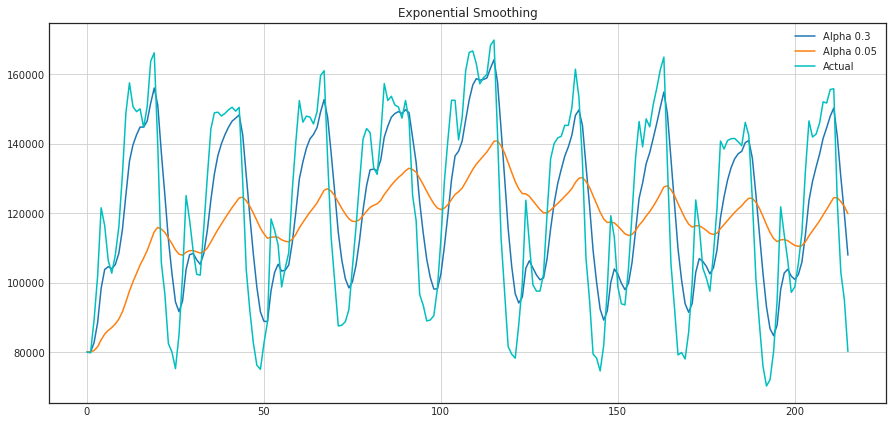

In [13]:
plotExponentialSmoothing(ads.Ads, [0.3, 0.05])

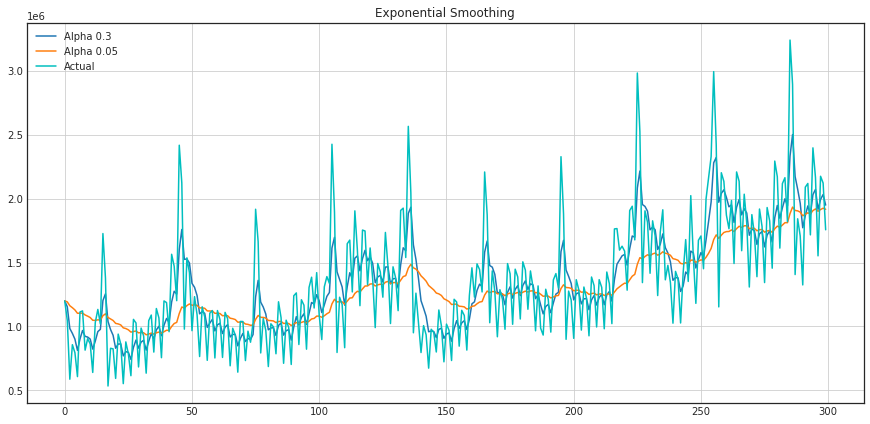

In [14]:
plotExponentialSmoothing(currency.GEMS_GEMS_SPENT, [0.3, 0.05])

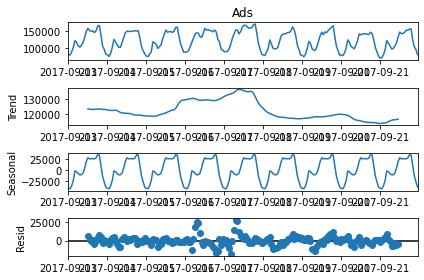

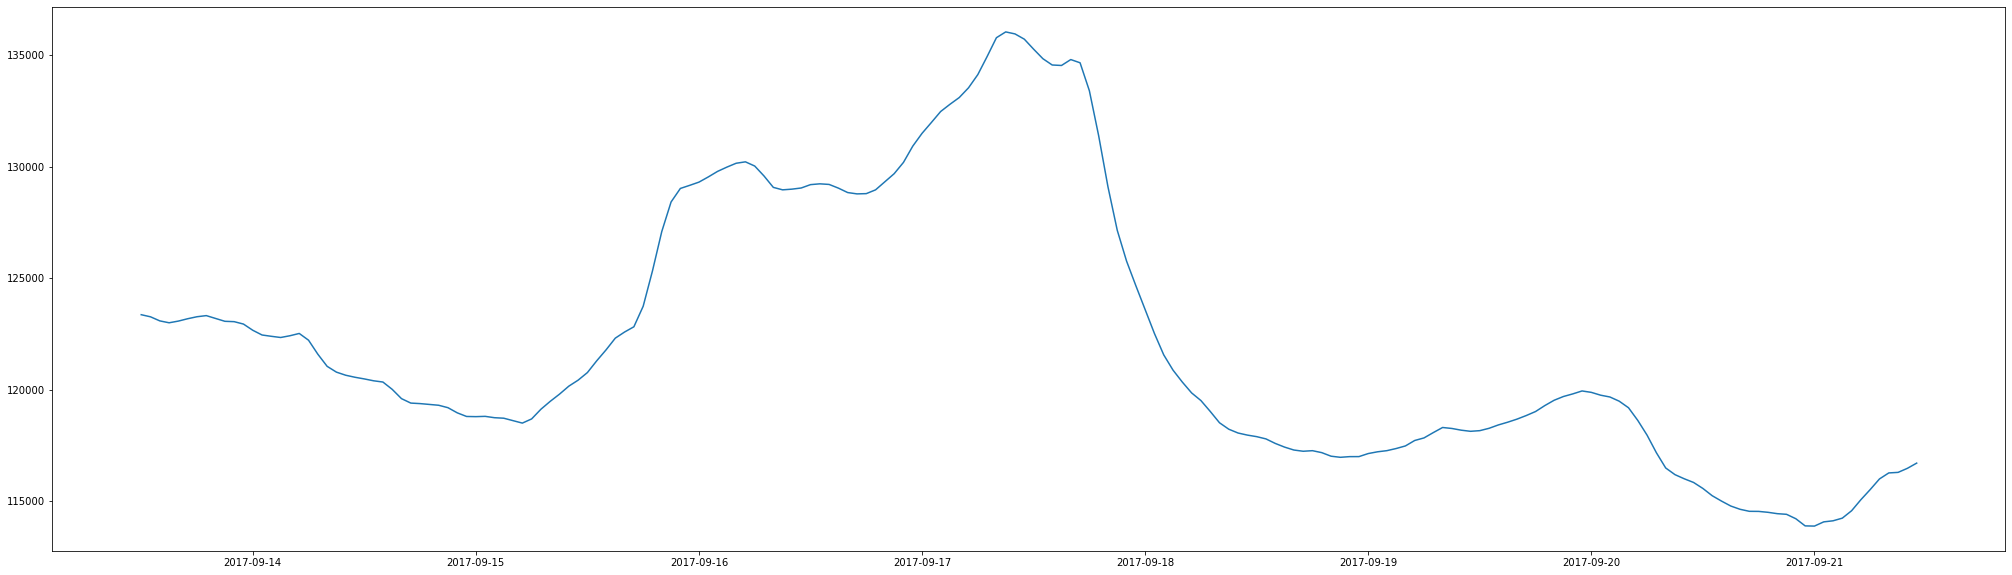

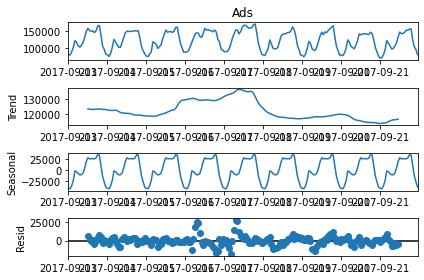

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ads.Ads, model='additive')  # model='multiplicative' also works
plt.figure(figsize = (35,10))
plt.plot(result.trend)
result.plot()

In [16]:
result

In [17]:
result.seasonal.head(31)

Time
2017-09-13 00:00:00   -41858.409288
2017-09-13 01:00:00   -43002.159288
2017-09-13 02:00:00   -36118.825955
2017-09-13 03:00:00   -23636.325955
2017-09-13 04:00:00    -1811.690538
2017-09-13 05:00:00    -3661.794705
2017-09-13 06:00:00    -7931.495226
2017-09-13 07:00:00   -10800.766059
2017-09-13 08:00:00   -10563.708767
2017-09-13 09:00:00    -6833.135851
2017-09-13 10:00:00     4649.051649
2017-09-13 11:00:00    19909.103733
2017-09-13 12:00:00    28443.726128
2017-09-13 13:00:00    25918.713108
2017-09-13 14:00:00    26699.507378
2017-09-13 15:00:00    25970.223524
2017-09-13 16:00:00    26030.809462
2017-09-13 17:00:00    28115.405816
2017-09-13 18:00:00    35495.731337
2017-09-13 19:00:00    34568.817274
2017-09-13 20:00:00    10783.973524
2017-09-13 21:00:00   -13831.638455
2017-09-13 22:00:00   -27295.336372
2017-09-13 23:00:00   -39239.776476
2017-09-14 00:00:00   -41858.409288
2017-09-14 01:00:00   -43002.159288
2017-09-14 02:00:00   -36118.825955
2017-09-14 03:00:00   -

In [18]:
series = ads.Ads - result.seasonal - result.trend


In [19]:
series = series.dropna()

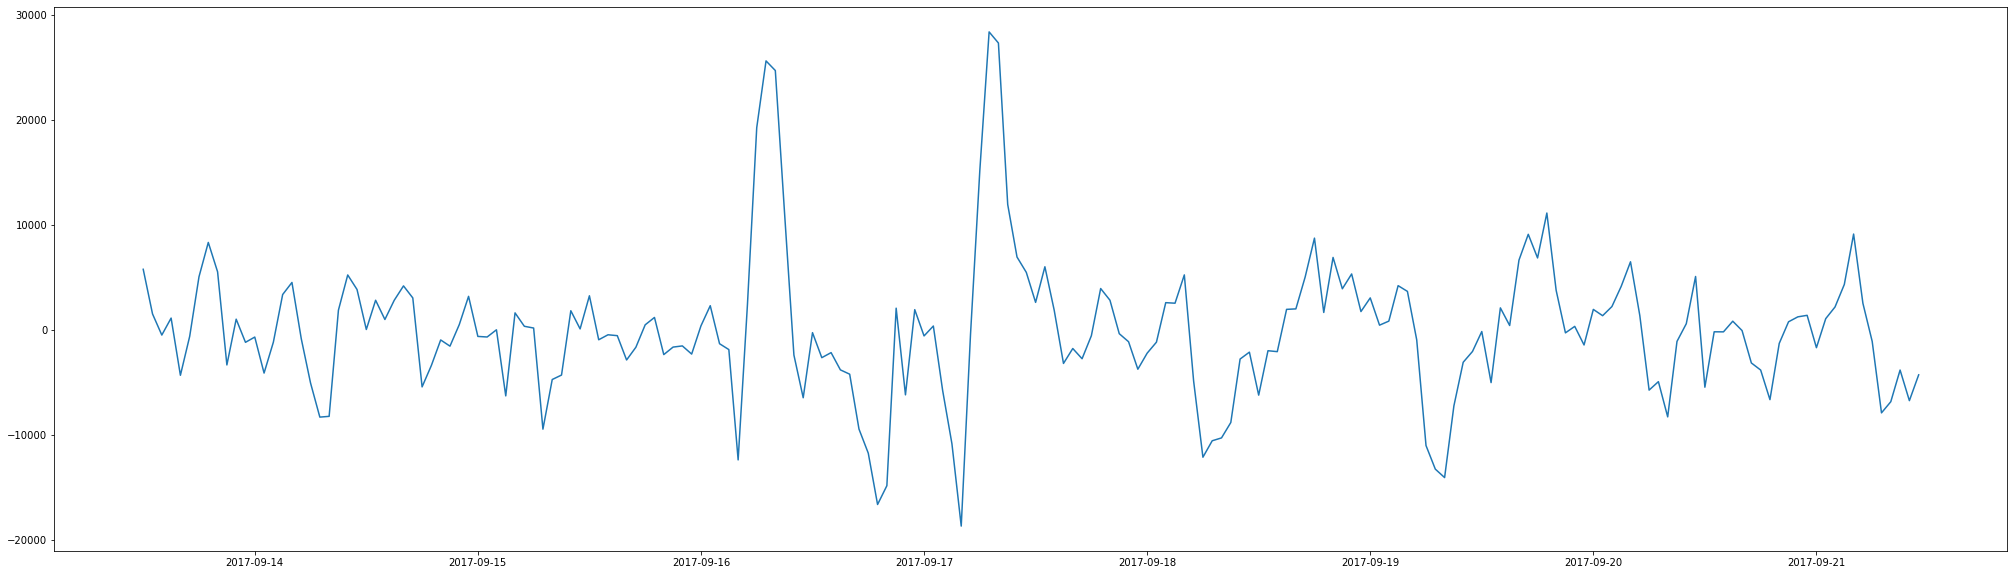

In [20]:
plt.figure(figsize = (35,10))
plt.plot(series)

In [21]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

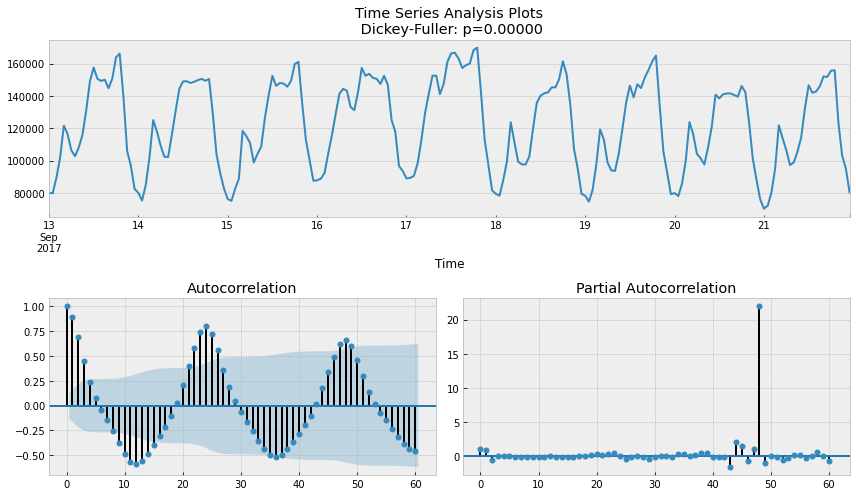

In [22]:
tsplot(ads.Ads, lags=60)

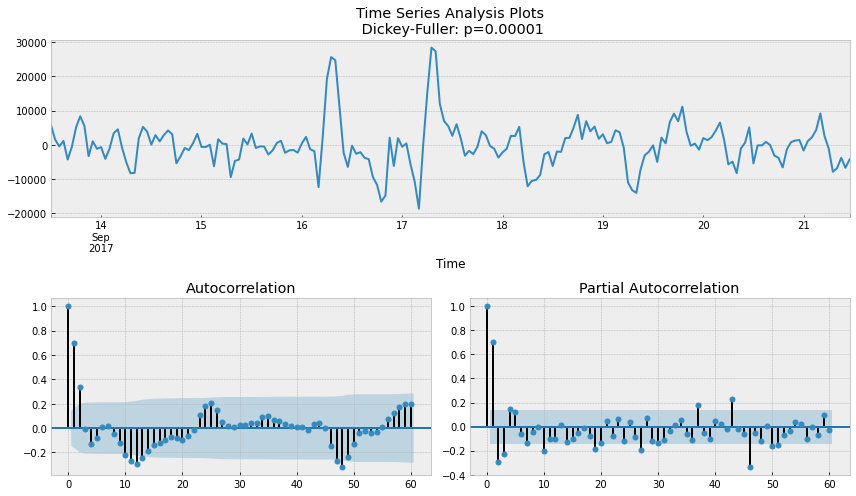

In [23]:
tsplot(series, lags=60)

## ARMA (1,2)

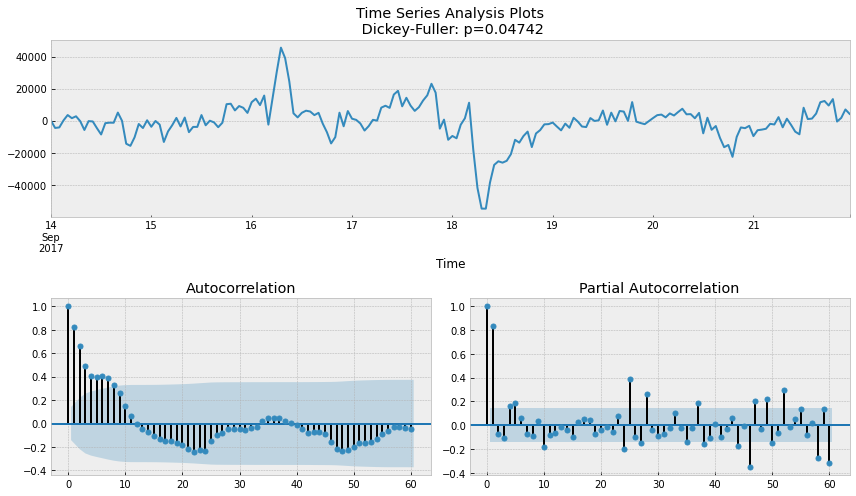

In [24]:
ads_diff = ads.Ads - ads.Ads.shift(24)
tsplot(ads_diff[24:], lags=60)

## We expect this to have an AR(1) formulation

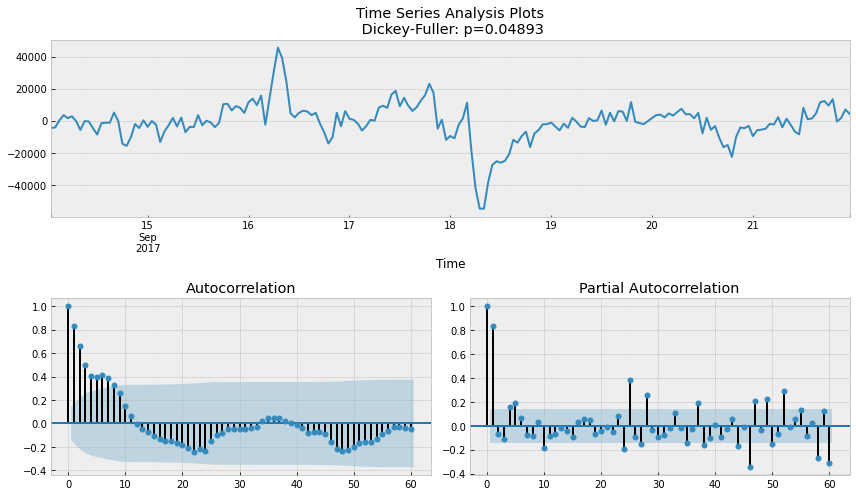

In [25]:
ads_diff1 = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)

## Cant see either AR or MA formulation

In [26]:
# setting initial values and some bounds for them
ps = range(0, 5)
d=1 
qs = range(0, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

100

In [27]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [28]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency infor

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information


CPU times: user 9min 44s, sys: 6.86 s, total: 9min 51s
Wall time: 2min 34s


In [29]:
result_table.head()

,parameters,aic
0,"(4, 0, 1, 1)",3887.190780
1,"(2, 3, 1, 1)",3888.642174
2,"(3, 2, 1, 1)",3888.763572
3,"(4, 1, 1, 1)",3889.334198
4,"(4, 2, 1, 1)",3890.279733


In [30]:
# pip install pmdarima

In [31]:
from pmdarima import auto_arima

In [32]:
stepwise_fit = auto_arima(ads.Ads,seasonal=True,m=24,start_p=0, start_q=0, max_p=5,  max_q=5,
                          trace=True,n_jobs=-1)
                          
#max_d=2


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=4934.934, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=5028.062, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=4551.150, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=4859.647, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=5684.857, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=4664.942, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=4551.970, Time=2.88 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=4552.743, Time=0.72 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=4587.487, Time=0.14 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=5023.607, Time=0.30 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=4500.745, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=4558.818, Time=0.04 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=4500.375, Time=3.69 sec
 ARIMA(2,0,0)(2,0,1)[24]

In [34]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  216
Model:             SARIMAX(3, 0, 4)x(2, 0, [1], 24)   Log Likelihood               -2221.455
Date:                              Mon, 25 Jan 2021   AIC                           4466.910
Time:                                      21:24:44   BIC                           4507.413
Sample:                                           0   HQIC                          4483.273
                                              - 216                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.452e+04   2.37e+04      1.037      0.300   -2.18e+04    7.09e+04
ar.L1         -0.8657      0.218     -3.975      0.000      -1.292      -0.439
ar.L2          0.1360      0.284      0.479      0.632      -0.421       0.693
ar.L3          0.5245      0.218      2.411      0.016       0.098       0.951
ma.L1          1.9798      0.244      8.121      0.000       1.502       2.458
ma.L2          1.9238      0.490      3.930      0.000       0.964       2.883
ma.L3          1.0191      0.468      2.179      0.029       0.102       1.936
ma.L4          0.4126      0.216      1.914      0.056      -0.010       0.835
ar.S.L24       0.6936      0.440      1.578      0.115      -0.168       1.555
ar.S.L48       0.1397      0.331      0.422      0.673      -0.509       0.789
ma.S.L24      -0.2457      0.399     -0.615      0.538      -1.028       0.537
sigma2      7.738e+07     11.371   6.81e+06      0.000    7.74e+07    7.74e+07
===================================================================================
Ljung-Box (Q):                       37.99   Jarque-Bera (JB):                11.39
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.32
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+22. Standard errors may be unstable.
"""

In [35]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                  Ads   No. Observations:                  216
Model:             SARIMAX(4, 1, 0)x(1, 1, [1], 24)   Log Likelihood               -1936.595
Date:                              Mon, 25 Jan 2021   AIC                           3887.191
Time:                                      21:24:46   BIC                           3909.957
Sample:                                  09-13-2017   HQIC                          3896.412
                                       - 09-21-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0552      0.059      0.936      0.349      -0.060       0.171
ar.L2          0.05

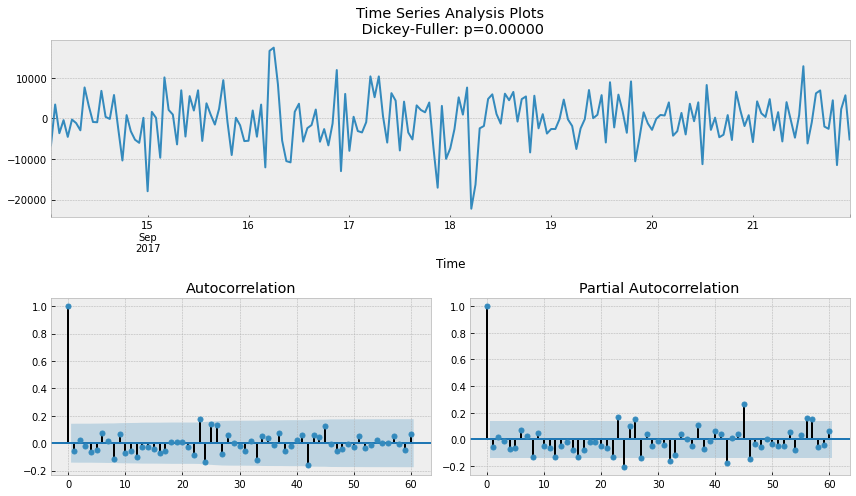

In [36]:
tsplot(best_model.resid[24+1:], lags=60)

In [37]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

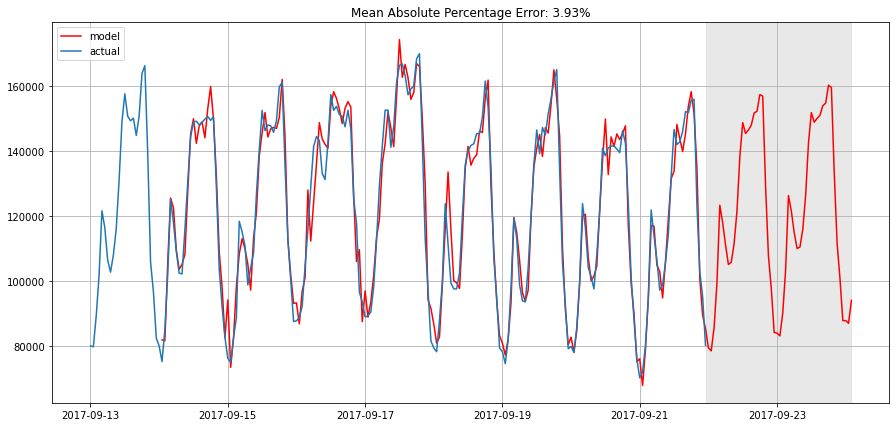

In [38]:
plotSARIMA(ads, best_model, 50)

In [39]:
## Non time series based modelling approach 

In [40]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(ads.Ads.copy())
data.columns = ["y"]

In [41]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)


In [42]:
# take a look at the new dataframe 
data.head(10)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Time,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 01:00:00,79885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,89325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 03:00:00,101930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 04:00:00,121630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 05:00:00,116475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 06:00:00,106495,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 07:00:00,102795,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 08:00:00,108055,89325.0,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [44]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [45]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [46]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

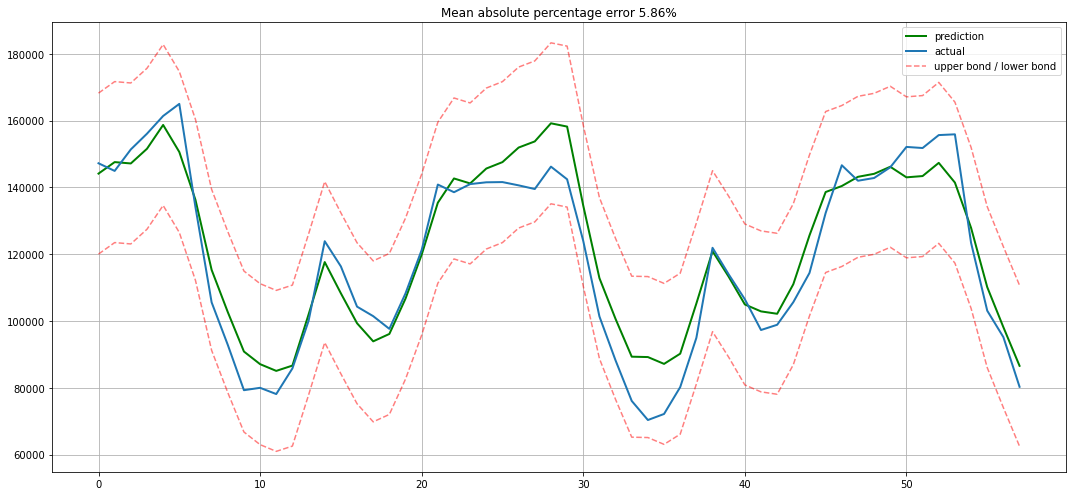

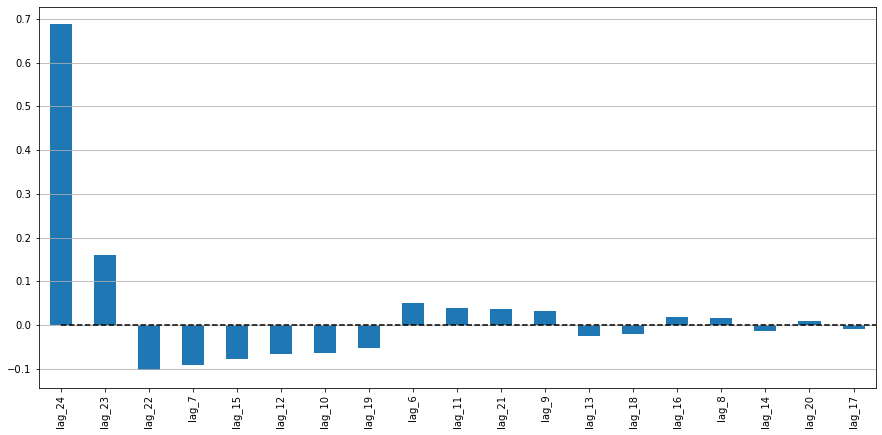

In [48]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [49]:
data.index = pd.to_datetime(data.index)
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.tail()

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,hour,weekday,is_weekend
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-21 19:00:00,155890,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,106495.0,113950.0,...,72150.0,70335.0,76050.0,88170.0,101360.0,123945.0,142425.0,19,3,0
2017-09-21 20:00:00,123395,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,106495.0,...,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0,123945.0,20,3,0
2017-09-21 21:00:00,103080,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,...,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0,21,3,0
2017-09-21 22:00:00,95155,152120.0,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,...,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,22,3,0
2017-09-21 23:00:00,80285,151790.0,152120.0,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,...,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,23,3,0


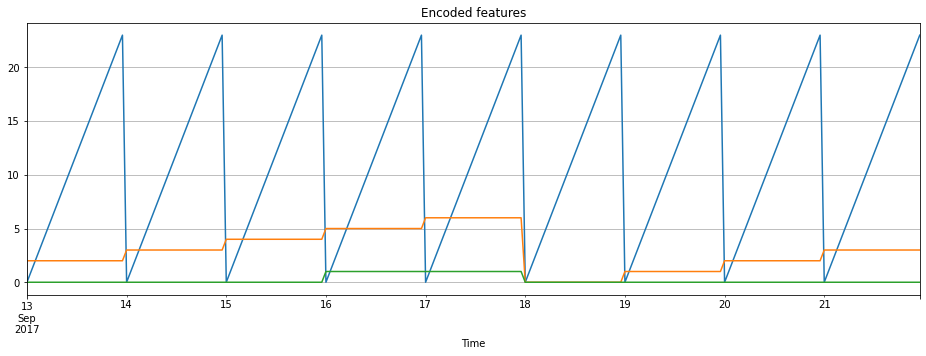

In [50]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.hour.plot()
data.weekday.plot()
data.is_weekend.plot()
plt.grid(True);

In [51]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

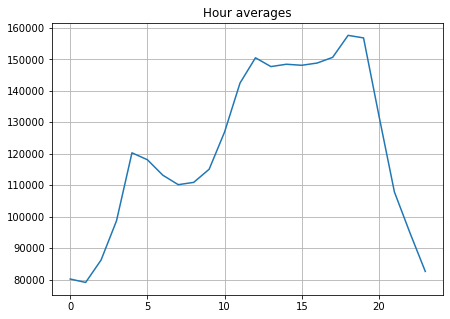

In [52]:
average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);

In [53]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

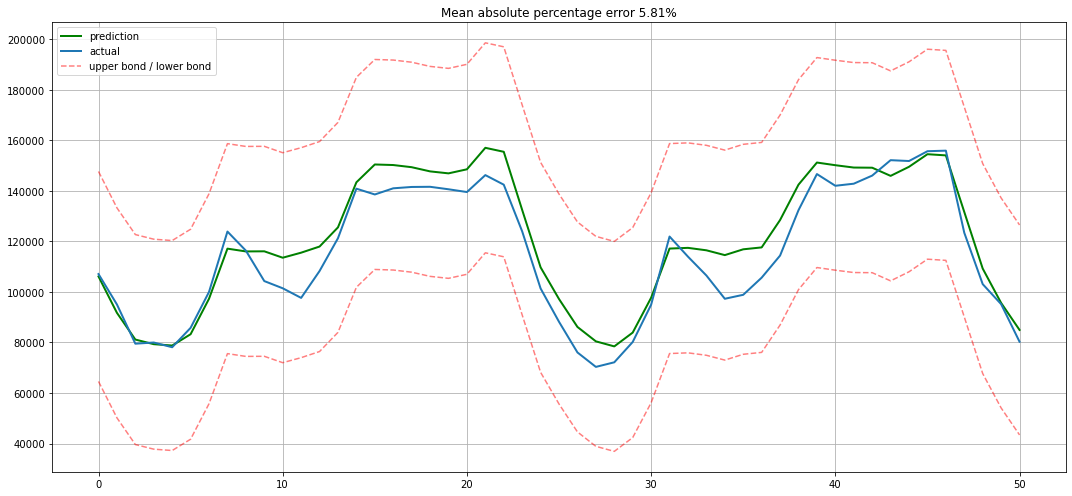

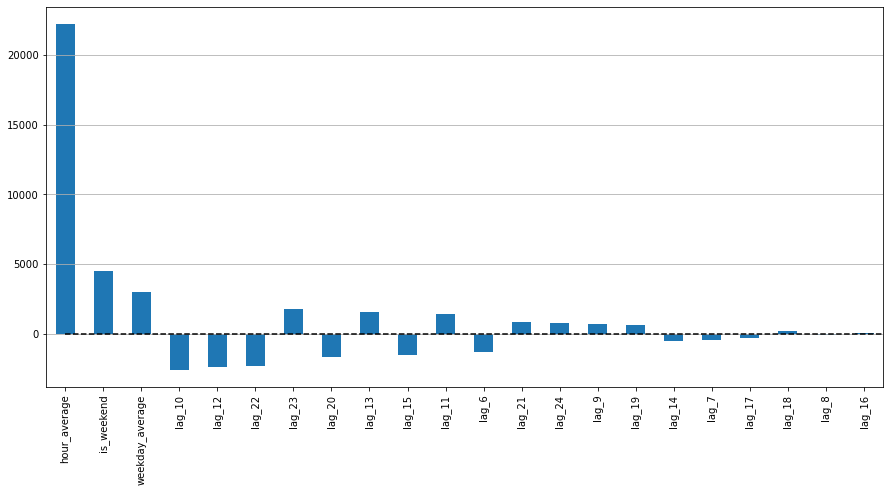

In [74]:
X_train, X_test, y_train, y_test = prepareData(ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=False)
plotCoefficients(lr)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

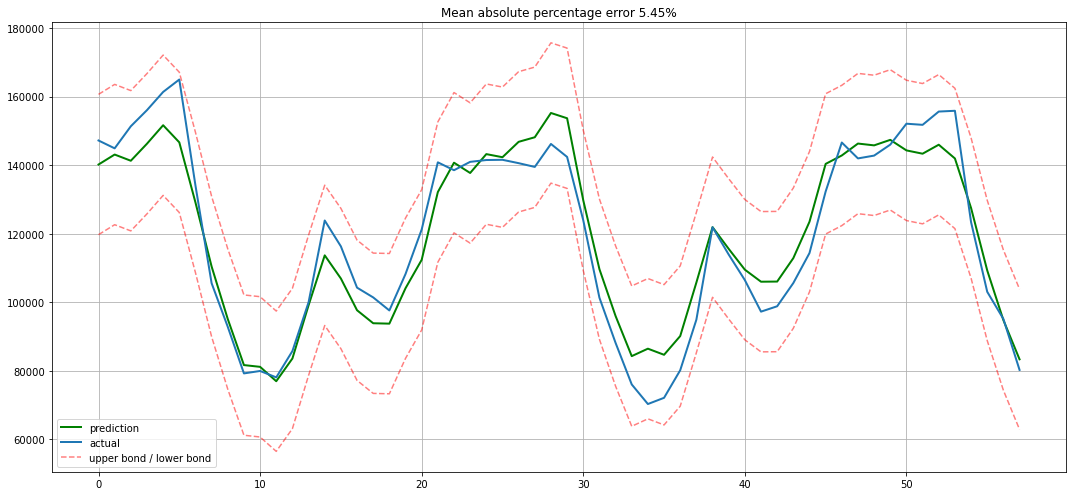

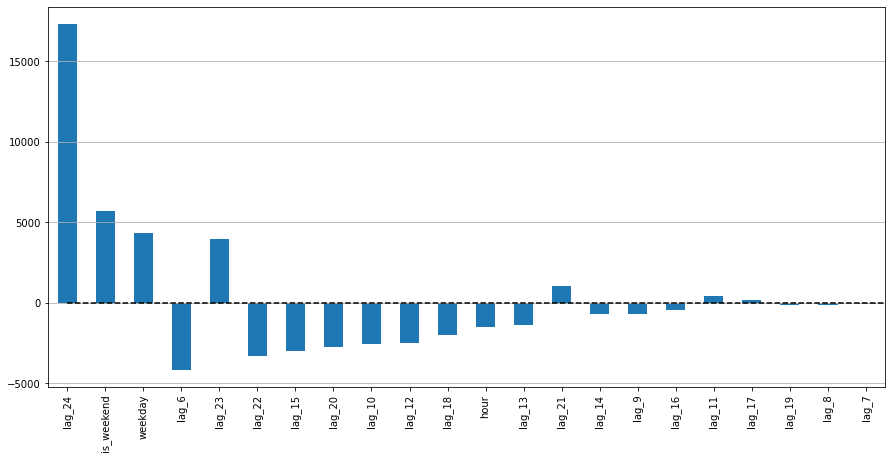

In [58]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

In [70]:
from xgboost import XGBRegressor 

X_train, X_test, y_train, y_test = prepareData(ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

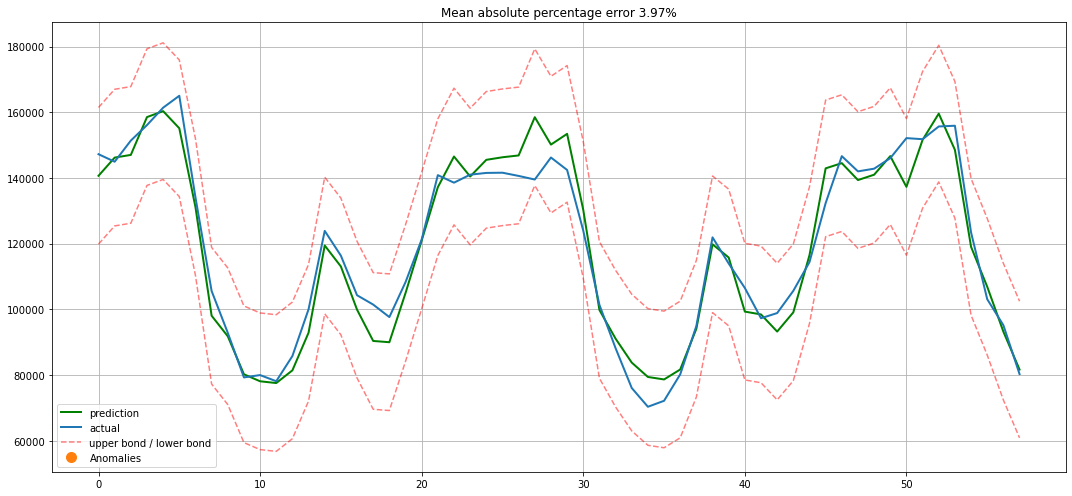

In [71]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [64]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = prepareData(ads.Ads, lag_start=4, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

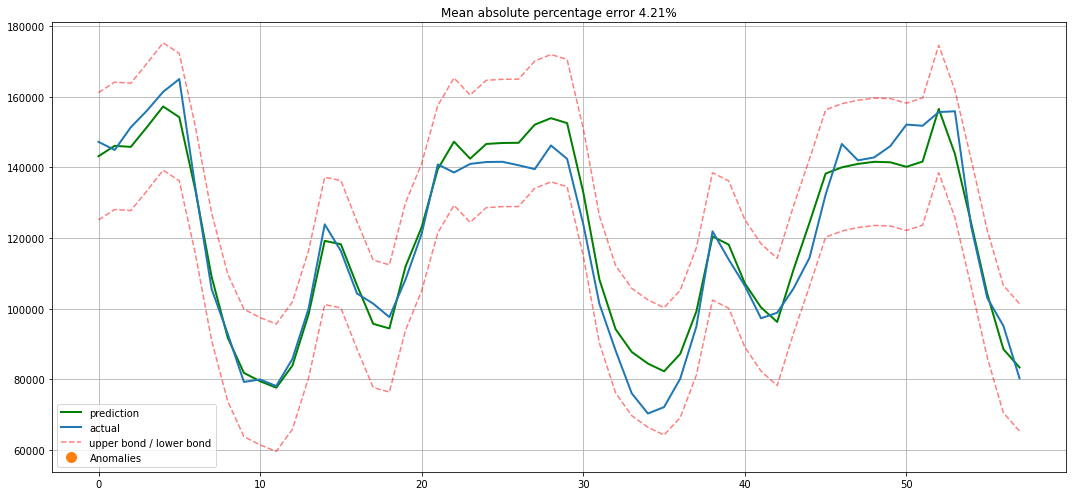

In [65]:
plotModelResults(rf, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

# Neural networks on time series #

In [75]:
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [76]:
df = ads

In [77]:
len(df)

216

In [78]:
216-48

168

In [79]:
train = df.iloc[:168]
test = df.iloc[168:]

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [83]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install tensorflow

     |████████████████████████████████| 173.9 MB 2.0 kB/s  eta 0:00:01    |█████████████████████▌          | 117.1 MB 9.8 MB/s eta 0:00:06
     |████████████████████████████████| 42 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 10.6 MB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 9.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.5 MB/s eta 0:00:011
     |████████████████████████████████| 96 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 16.0 MB/s eta 0:00:01
     |███████████████████████████████

In [86]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [87]:
# define generator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [88]:
len(generator)

144

In [90]:
# What does the first batch look like?
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.05717736 0.05476215 0.15389058 0.28625433 0.49312192 0.43898981
 0.33419091 0.2953376  0.3505723  0.4353145  0.59183031 0.78074136
 0.87073401 0.79854038 0.78362911 0.79208233 0.73621758 0.79827785
 0.93636459 0.96151423 0.68098288 0.32789037 0.23217473 0.08243201]
Predict this y: 
 [[0.05728237]]


In [91]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [92]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.fit_generator(generator,epochs=100)

Epoch 1/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0061
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0054
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0061
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0072
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0057
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 7/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 8/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 9/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 10/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0051
Epoch 11/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0051
Epoch 12/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 13/100


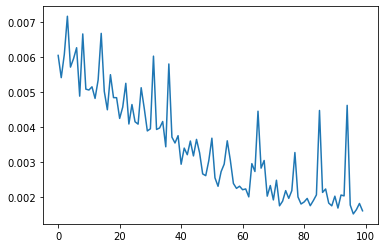

In [107]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [108]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [98]:
test_predictions

[array([0.01511641], dtype=float32),
 array([0.00873058], dtype=float32),
 array([0.0339349], dtype=float32),
 array([0.10669121], dtype=float32),
 array([0.1970218], dtype=float32),
 array([0.24424493], dtype=float32),
 array([0.27297437], dtype=float32),
 array([0.2963737], dtype=float32),
 array([0.3269022], dtype=float32),
 array([0.39195758], dtype=float32),
 array([0.46786997], dtype=float32),
 array([0.5424427], dtype=float32),
 array([0.5948504], dtype=float32),
 array([0.6300578], dtype=float32),
 array([0.65500367], dtype=float32),
 array([0.67594063], dtype=float32),
 array([0.69802964], dtype=float32),
 array([0.7201494], dtype=float32),
 array([0.7394421], dtype=float32),
 array([0.7172735], dtype=float32),
 array([0.47689024], dtype=float32),
 array([0.30311126], dtype=float32),
 array([0.19587089], dtype=float32),
 array([0.12575448], dtype=float32),
 array([0.08675036], dtype=float32),
 array([0.074459], dtype=float32),
 array([0.08368663], dtype=float32),
 array([0.107

In [109]:
true_predictions = scaler.inverse_transform(test_predictions)

In [110]:
test['Predictions'] = true_predictions

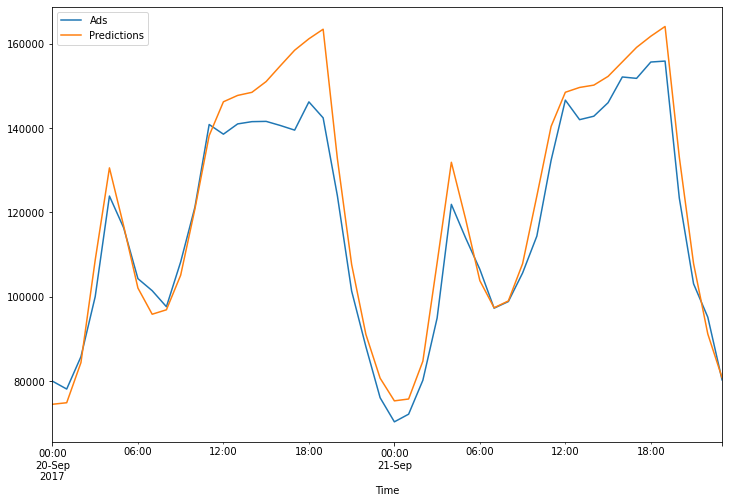

In [111]:
test.plot(figsize=(12,8))

In [102]:
test

,Ads,Predictions
Time,,
2017-09-20 00:00:00,79980,76109.535578
2017-09-20 01:00:00,78110,75501.413409
2017-09-20 02:00:00,85785,77901.620401
2017-09-20 03:00:00,100010,84830.204068
2017-09-20 04:00:00,123880,93432.385757
2017-09-20 05:00:00,116335,97929.444982
2017-09-20 06:00:00,104290,100665.349437
2017-09-20 07:00:00,101440,102893.666988
2017-09-20 08:00:00,97635,105800.897526


In [112]:
error = mean_absolute_percentage_error(test.Predictions, test.Ads)
print(error)

4.8441318116056795
